# Auto 
_Ch 02 - Statistical Learning - Q9 (applied)_  

__Description__  
Gas mileage, horsepower, and other information for 392 vehicles.

__Source__  
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.  
The dataset was used in the 1983 American Statistical Association Exposition.

__References__  
This dataset is a part of the course material of the [book](https://www.statlearning.com/) : ___Introduction to Statistical Learning with R___

__Short description of variables__  
- <b>mpg :</b> miles per gallon  
- <b>cylinders :</b> Number of cylinders between 4 and 8  
- <b>displacement :</b> Engine displacement (cu. inches)  
- <b>horsepower :</b> Engine horsepower  
- <b>weight :</b> Vehicle weight (lbs.)  
- <b>acceleration :</b> Time to accelerate from 0 to 60 mph (sec.)  
- <b>year :</b> Model year (modulo 100)  
- <b>origin :</b> Origin of car (1. American, 2. European, 3. Japanese)  
- <b>name : - <b> Vehicle name

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

<a id='toc2'></a>
### Index
- [1) Load packages](#1%29-Load-packages)  
- [2) Import Data](#2%29-Import-Data)
- [3) Data preparation](#3%29-Data-preparation)
- [a) Which of the predictors are quantitative, and which are qualitative?](#(a%29-Which-of-the-predictors-are-quantitative,-and-which-are-qualitative?)
- [b) What is the range of each quantitative predictor?](#(b%29-What-is-the-range-of-each-quantitative-predictor?)
- [c) What is the mean and standard deviation of each quantitative predictor?](#(c%29-What-is-the-mean-and-standard-deviation-of-each-quantitative-predictor?)
- [d) Range, mean and standard deviation after removing observations 10-85](#(d%29-Range,-mean-and-standard-deviation-after-removing-observations-10-85)
- [e) Graphical examination of predictors](#(e%29-Graphical-examination-of-predictors)
- [f) Variables useful in predicting mpg](#(f%29-Variables-useful-in-predicting-mpg)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### 1) Load packages

In [1]:
# Load requisite packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# plt.rcParams['figure.dpi'] = 120
sns.set_style(rc={"axes.facecolor": "w", 'figure.facecolor':'w'})
# plt.rcParams.update({'font.size':10,"axes.titlesize":11,'axes.labelsize':11})

#### *Some preliminary workings*

In [2]:
# Function to suppress UserWarnings
import warnings
def fxn():
    warnings.warn("UserWarning arose", UserWarning)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### 2) Import Data

In [3]:
# File path
fdir = r"E:\Data Science\Statistics\Intro to Statistical Learning with R"
fpath = os.path.join(fdir, 'datasets', 'Auto.csv')
os.path.exists(fpath)

True

In [4]:
# Import data
dfo = pd.read_csv(fpath)
print(dfo.shape)
dfo.head(3)

(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [5]:
# Check for missing data
dfo.isna().sum().sum()

0

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### 3) Data preparation

In [6]:
# Creating a copy that can be modified so that original is preserved if reqd
df = dfo.copy(deep=True)

In [7]:
# Checking if variables have been saved per their nature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


The fact that a column containing numbers (horsepower) has been saved as dtype 'object' is a red flag, as 'object' dtype can be used to save columns with strings as well as numerals. This column will have to be further examined.

In [8]:
# Rows with non-numeric values
df[~df['horsepower'].str.isnumeric()]
# Variable saved as object is not exactly a string, so .str needs to be used

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


Since the number of missing values is very small, those rows can just be deleted.

In [9]:
# Rows with ? in horsepower
df[~df.horsepower.str.isnumeric()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [10]:
# Rows with ? in any column
df[df.applymap(lambda x: x=='?').any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [11]:
# Deleting rows with ?
df.drop(df.index[~df.horsepower.str.isnumeric()], axis=0, inplace=True)
df.shape

(392, 9)

In [12]:
# Convert horsepower to numeric
df['horsepower'] = pd.to_numeric(df.horsepower, errors='coerce')
df.horsepower.dtype

dtype('int64')

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### (a) Which of the predictors are quantitative, and which are qualitative?

*Quantitative* &rarr; numerical values.  
*Qualitative* &rarr; values in one of K different classes, or categories.

In [13]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [14]:
# No. of unique values in columns
for col in df.columns:
    print(f'{col} : {df[col].nunique()}')

mpg : 127
cylinders : 5
displacement : 81
horsepower : 93
weight : 346
acceleration : 95
year : 13
origin : 3
name : 301


| variable | description | variable type
| :--- | :--- | :---
| mpg | miles per gallon | quantitative
| cylinders | Number of cylinders between 4 and 8 | qualitative or categorical
| displacement | Engine displacement (cu. inches) | quantitative
| horsepower | Engine horsepower | quantitative
| weight | Vehicle weight (lbs.) | quantitative
| acceleration | Time to accelerate from 0 to 60 mph (sec.) | quantitative
| year |Model year (modulo 100) | quantitative
| origin | Origin of car (1. American, 2. European, 3. Japanese) | qualitative or categorical
| name | Vehicle name | qualitative or categorical

"year" can be considered to be quantitative in the sense that it could indirectly reflect the impact of technological abilities of the times, otherwise it can be considered qualitative (categorical).

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### (b) What is the range of each quantitative predictor?

In [15]:
# Quantitative predictors
quant_data = df[df.columns[~df.columns.isin(['cylinders','origin','name'])]]
quant_data.columns.tolist()

['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']

In [16]:
# 5 no. summary
df_summary = quant_data.describe()
summ = df_summary.loc[['min','max']]
summ.loc['range'] = summ.loc['max'] - summ.loc['min']
summ

,mpg,displacement,horsepower,weight,acceleration,year
min,9.0,68.0,46.0,1613.0,8.0,70.0
max,46.6,455.0,230.0,5140.0,24.8,82.0
range,37.6,387.0,184.0,3527.0,16.8,12.0


[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### (c) What is the mean and standard deviation of each quantitative predictor?

In [17]:
for i in ['mean','std']:
    summ.loc[i] = df_summary.loc[i]
summ.round(2)

,mpg,displacement,horsepower,weight,acceleration,year
min,9.00,68.00,46.00,1613.00,8.00,70.00
max,46.60,455.00,230.00,5140.00,24.80,82.00
range,37.60,387.00,184.00,3527.00,16.80,12.00
mean,23.45,194.41,104.47,2977.58,15.54,75.98
std,7.81,104.64,38.49,849.40,2.76,3.68


[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### (d) Range, mean and standard deviation after removing observations 10-85

In [18]:
# Removing rows 10-85
df1 = quant_data.drop(quant_data.index[9:85], axis=0)

# df1 = quant_data.iloc[~quant_data.index.isin(range(9,86))]
# To remove obs 10-85, >> range(10-1,85-1+1) >> range(9,85)  << 76 rows
# But range() is behaving differently within .isin()  << removing 75 only (till 84), 
# To remove till 85th obs, .isin(range(9,86)) has to be used

df1.shape

(316, 6)

In [19]:
# Check if the 10th row in filtered dataset matches 86th row of unfiltered dataset
(df1.iloc[9] == quant_data.iloc[85]).all()

True

In [20]:
df1_summary = df1.describe()
summ1 = df1_summary.loc[['min','max']]
summ1.loc['range'] = summ1.loc['max'] - summ1.loc['min']
for i in ['mean','std']:
    summ1.loc[i] = df1_summary.loc[i]
summ1.round(3)

,mpg,displacement,horsepower,weight,acceleration,year
min,11.000,68.000,46.000,1649.000,8.500,70.000
max,46.600,455.000,230.000,4997.000,24.800,82.000
range,35.600,387.000,184.000,3348.000,16.300,12.000
mean,24.404,187.241,100.722,2935.972,15.727,77.146
std,7.867,99.678,35.709,811.300,2.694,3.106


In [21]:
# Check sum
df1.apply(lambda x: sum(x))

mpg               7711.8
displacement     59168.0
horsepower       31828.0
weight          927767.0
acceleration      4969.7
year             24378.0
dtype: float64

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### (e) Graphical examination of predictors

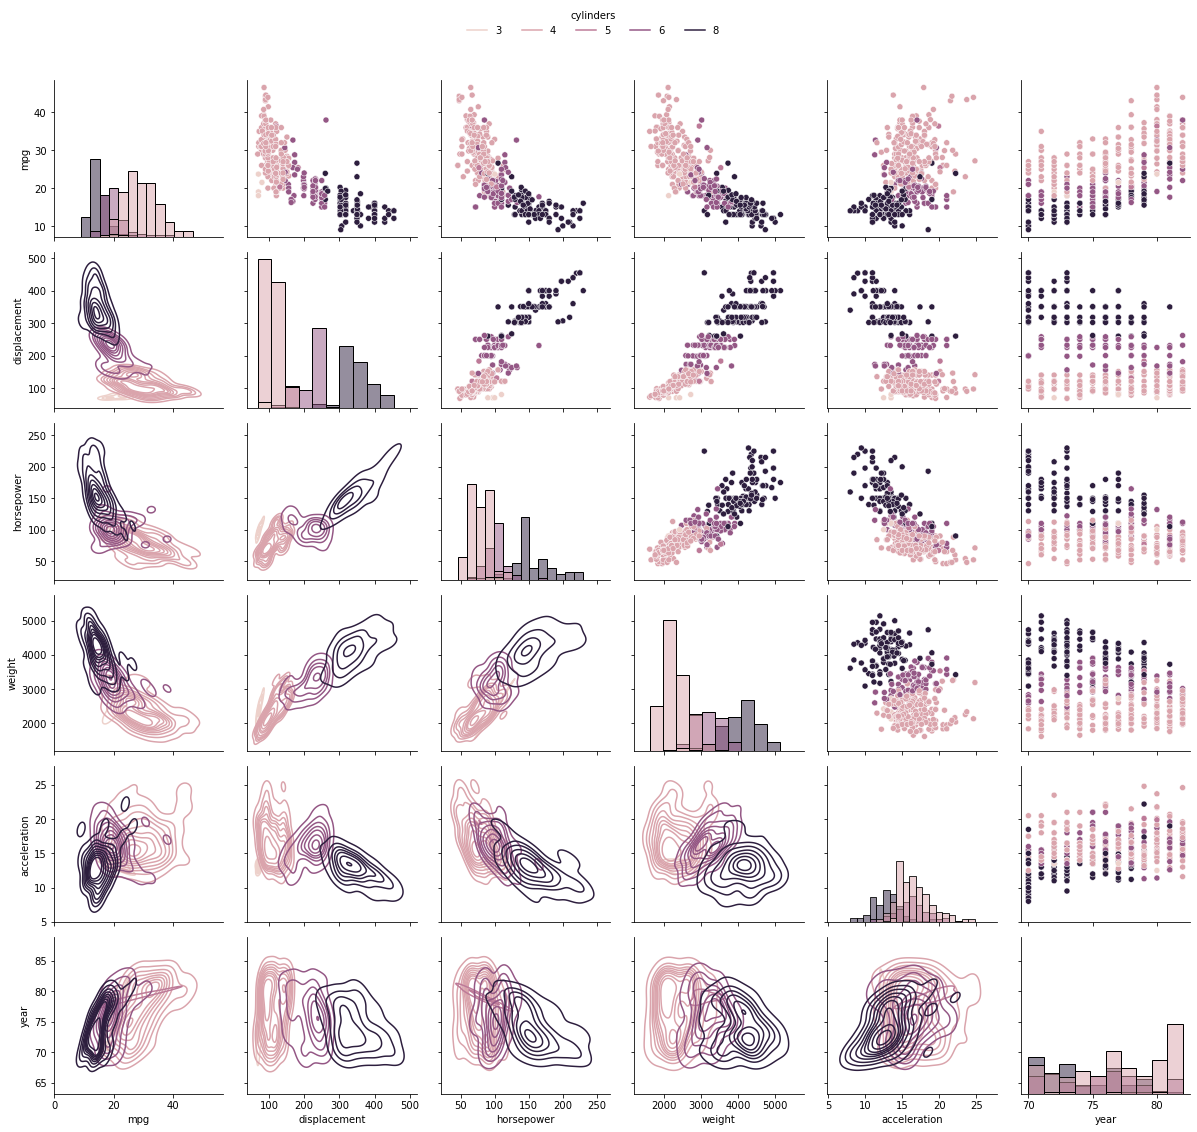

In [22]:
# Scatter plot matrix with "cylinder" as hue 
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

    fig = sns.PairGrid(df, vars=df.columns[~df.columns.isin(['cylinders','origin','name'])].tolist(), 
                       hue='cylinders')
    plt.gcf().set_size_inches(17,15)
    fig.map_diag(sns.histplot)
    fig.map_upper(sns.scatterplot)
    fig.map_lower(sns.kdeplot)
    fig.add_legend(ncol=5, loc=1, bbox_to_anchor=(0.5, 1.05), borderaxespad=0, frameon=False);

<div class="alert alert-block alert-info">
<a id=''></a>
<b>Observations:</b><br>
    - acceleration appears to be roughly normally distributed.<br>
    - Increase in no. of cylinders leads to <br>
    &ensp;• lower : mpg, acceleration<br>
    &ensp;• higher : displacement, horsepower, weight<br>
    - There has been a decline in the no. of new models coming out with 8 cylinders.<br>
    - Newer models are lighter and and have loss horsepower (presumably because of decreased weight).<br> 
    - mpg appears to have strong (non-linear) relationships with displacement, horsepower, weight and is negatively correlated with the 3 variables.<br>
    - Fuel efficiency of new models has imporoved over the years. Minimum mpg has almost doubled in the span of 12 years.<br>
    &ensp;Mazda GLC, of Japenese origin, is the car with the highest mpg, 44.6, and came out in 1980.<br>
    - displacement, horsepower and weight appear to have a strong positive correlation with each other.<br>
    - A moderate negative correlation may exist between horsepower and acceleration.<br>
</div>

In [23]:
# Converting column cylinder to factor before using for 'color'
df.cylinders = df.cylinders.astype('category')

# Scatter plot - Cylinders as hue
pal = ['#fdc086','#386cb0','#beaed4','#33a02c','#f0027f']
col_map = dict(zip(sorted(df.cylinders.unique()), pal))
fig = px.scatter(df, y='mpg', x='year', color='cylinders', 
                 color_discrete_map=col_map, 
                 hover_data=['name','origin'])
fig.update_layout(width=800, height=400, plot_bgcolor='#fff')
fig.update_traces(marker=dict(size=8, line=dict(width=0.2,color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [24]:
# Converting column cylinder to factor before using for 'color'
df.origin = df.origin.astype('category')

# Scatter plot - Cylinders as hue
symb = ['triangle-up','circle','x']
symb_map = dict(zip(sorted(df.origin.unique()), symb))
fig = px.scatter(df, y='mpg', x='year', color='origin', hover_data=['name','cylinders'],
                 color_discrete_sequence=px.colors.qualitative.Set1, symbol='origin',
                 symbol_map=symb_map)
fig.update_layout(title=dict(text="Scatter Plot", xanchor='left', x=0.4, yanchor="top", y=0.99), 
                  width=700, height=450, plot_bgcolor='#fff', showlegend=True, 
                  legend=dict(orientation="h", xanchor="left", x=0.3, yanchor='top', y=1))
fig.update_traces(marker=dict(size=8, line=dict(width=0.2,color='DarkSlateGrey')), 
                  selector=dict(mode='markers'))
fig.show()

# dir(px.colors.qualitative)
# https://plotly.com/python/marker-style/

**origin** : 1 - American, 2 - European, 3 - Japanese<br>

[go to toc](#toc2)

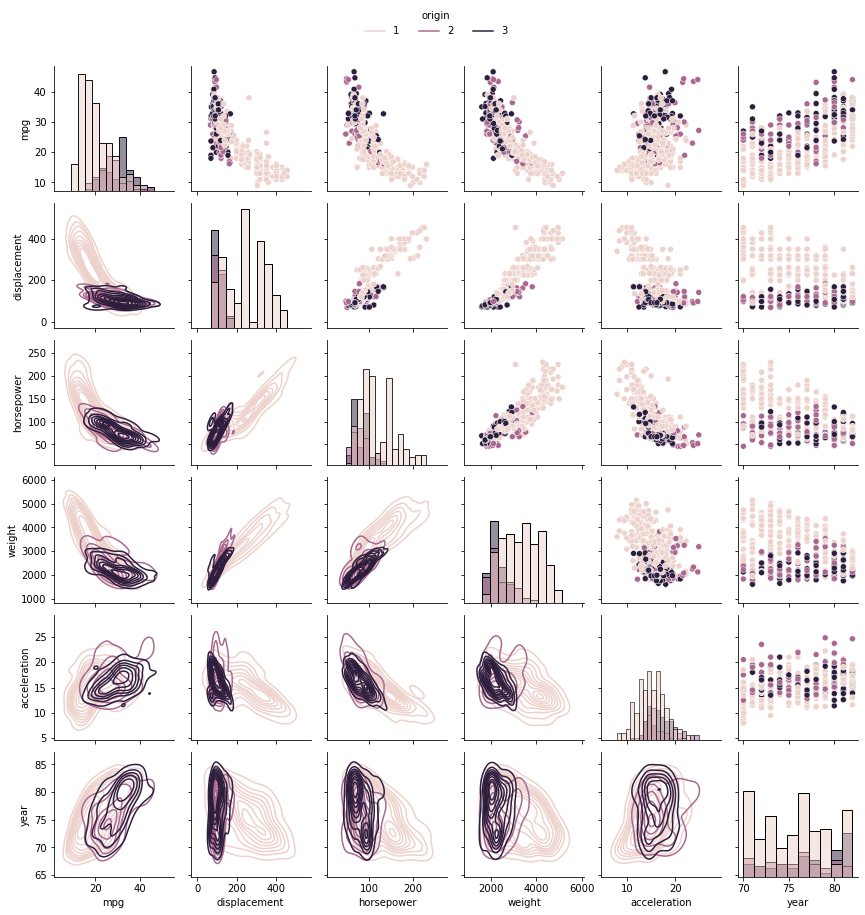

In [25]:
# Scatter plot matrix - origin as hue
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

    fig = sns.PairGrid(df, vars=df.columns[~df.columns.isin(['cylinders','origin','name'])].tolist(), 
                       hue='origin', palette=sns.cubehelix_palette(3, as_cmap=False))
    plt.gcf().set_size_inches(12,12)
    fig.map_diag(sns.histplot)
    fig.map_upper(sns.scatterplot)
    fig.map_lower(sns.kdeplot)
    fig.add_legend(ncol=5, loc=1, bbox_to_anchor=(0.5, 1.05), borderaxespad=0, frameon=False);

<div class="alert alert-block alert-info">
<a id=''></a>
<b>Observations:</b><br>
    - Cars of European (2) and Japenese (3) origin can be seen to be overlapping in every criteria in the contour plots whereas American cars (1) have a larger and distict spread.<br>
    - Clear distinctions can be seen between American and the other 2 carmakers in displacement, horsepower and weight.
</div>

##### --&nbsp; <i>Workings</i> &nbsp; --------------------------------------------------------------

In [26]:
# Frequency distribution of cylinders
df.cylinders.value_counts(sort=False)

3      4
4    199
5      3
6     83
8    103
Name: cylinders, dtype: int64

In [27]:
# year-wise distribution of cars with cylinder count
cyl_year = pd.pivot_table(df, values='name', index='year', columns='cylinders', aggfunc=len, 
                          fill_value=0)
cyl_year

cylinders,3,4,5,6,8
year,,,,,
70,0,7,0,4,18
71,0,12,0,8,7
72,1,14,0,0,13
73,1,11,0,8,20
74,0,15,0,6,5
75,0,12,0,12,6
76,0,15,0,10,9
77,1,14,0,5,8
78,0,17,1,12,6


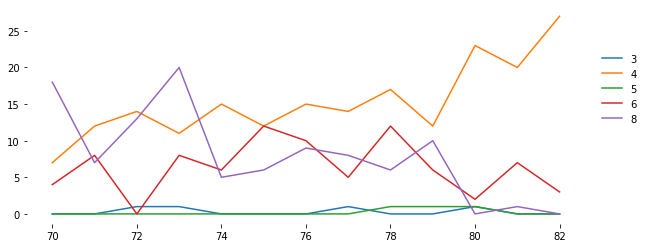

In [28]:
# No. of cars coming out with cylinder categories
plt.plot(cyl_year)
plt.gca().set(frame_on=False)
plt.gcf().set_size_inches(10,4)
plt.legend(cyl_year.columns, bbox_to_anchor=(1.1, 0.8), borderaxespad=0, frameon=False);

<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### (f) Variables useful in predicting mpg

Except for acceleration, all the varibles display some sort of relationship or trend with mpg, whether positive or negative. <br>
_Positive_ : year<br>
_Negative_ : cylinders, displacement, horsepower, weight<br>
_Non-directional_ : origin<br>
They can be taken into account for predicting mpg, after adjusting for collinearity.

<center><b>-------------------------------------------- &ensp; <i>That's All Folks!</i> &ensp; --------------------------------------------</b></center>